# Lorentzian fit to your data

this notebook performs a non-linear least squares fit of a Lorentzian function to your data.

*If you are looking at this notebook on Github you can download it to your machine by right-clicking on the 'Raw' button above and selecting 'save link as'.*

Remember these notebooks run from top to bottom and you need to execute the code in a cell for python to know about it.

If you need help interacting with this notebook - see [here](https://mybinder.org/v2/gh/mattatlincoln/python/master?filepath=Quickstart%20guide%20to%20Jupyter%20notebooks.ipynb).

### Some house keeping

First, we import some libraries that we will need to perform our data analyis.

In [1]:
import numpy as np
import pandas as pandas
import matplotlib.pyplot as plt
from scipy import optimize

## Getting our data into python

The pandas library is used for data analysis - it is kind of a mix of the functionality of a database and a spreadsheet. 

You can load in an Excel file that is in the same directory as the notebook like this. 

It will be loaded into a pandas datatype called a dataframe.

In [2]:
df = pandas.read_excel('Example data for RLC.xlsx')

If your file is called a different name - change the file name in the argument of the ``read_excel method``.

Let's check the data has imported OK. The head() method of the dataframe displays the column titles and the first 5 data rows.

In [3]:
df.head()

,"frequency, Hz","Current, mA","Voltage, V",Impedance (Z),1/Z
0,0.5,0.5,1.6,3.200000,0.3125
1,1.0,1.0,1.6,1.600000,0.6250
2,1.5,2.0,1.6,0.800000,1.2500
3,2.0,3.0,1.6,0.533333,1.8750
4,2.2,4.0,1.6,0.400000,2.5000


To access a column of data we can use ``df['name_of_the_column'[:]]``. We copy them into some new arrays to avoid having to type all those strange square brackets etc. 

In [4]:
freq = df['frequency, Hz'[:]]
oneOverZ = df['1/Z'[:]]

## Plotting our data

Now we can use the matplotlib library (which we called plt for short) to visualize our data.

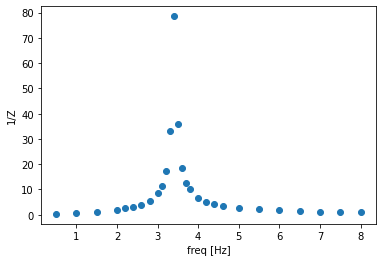

In [5]:
plt.scatter(freq,oneOverZ)
plt.xlabel('freq [Hz]')
plt.ylabel('1/Z');

## Specifying the function to fit

Now we define our fitting function. Here we pass it the x (freq) value we want and it returns the value of a lorentzian at that point. We can also pass x0 the peak of the function, gamma the width parameter of the function,  and the area under the function. 

We are going to fit a Lorentzian
$$
L = \frac{ A \Gamma}{2\pi} \left( \frac{1}{(x-x_0)^2 + (\frac{1}{2}\Gamma)^2} \right)
$$

In [6]:
"""
function that returns the value of a Lorentzian with parameters x0, gamma and scale.
x0, gamma and scale default to values 3.5, 1.0 and 1.0 if not explicitly given.
"""
def lorentzian(x, x0=3.5, gamma=1, A=1):
    pi = np.pi
    L = 1/pi * A * 0.5* gamma * (1/((x-x0)**2 + (0.5*gamma)**2))
    return L

In [7]:
# if I call the function with a single value it returns
# the value of the lorentizan with the default parameters x0 =3.5, gamma=1 and scale = 1
lorentzian(2.5)

0.12732395447351627

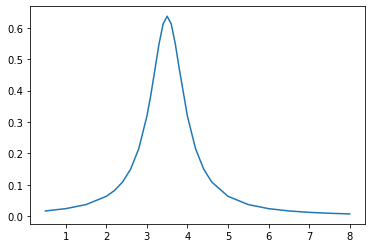

In [8]:
plt.plot(freq,lorentzian(freq));

## Performing the fit

Here is the fancy bit that actually does the fitting i.e. finds the best values of $x_0, \Gamma$ and $A$

We are using the optimize function from the scipy library. We give the function our function to fit (lorentzian), our data (freq and oneOverZ) and p0 which contains intitial values of the parameters in our fitting function: 3 in this case x0, gamma and A.

In [9]:
params, params_covariance = optimize.curve_fit(lorentzian, freq, oneOverZ, p0=[3.5, 1, 70])
print(params)

[ 3.40303835  0.20603319 24.72121445]


It returns the least squared values of the parameters in our model as the array params. So here the first value returned in the params array is the first parameter in our fitting function. If we look at the fitting function definition we see that it is x0

``def lorentzian(x, x0=3.5, gamma=1, scale=1):``

A value of 3.40 makes sense looking at the data. The next to values are the width parameter, gamma $\Gamma$, and the area that scales the curve.

It also returns the covariance matrix of those parameters, which can be used for statistical analysis of the quality of the fit.

In [10]:
params_covariance

array([[ 2.90292127e-05, -3.44648476e-06, -1.36340132e-04],
       [-3.44648476e-06,  1.35210127e-04,  9.18782373e-03],
       [-1.36340132e-04,  9.18782373e-03,  1.23279823e+00]])

# Examining our fit

we can plot our data and the fit to it like this:

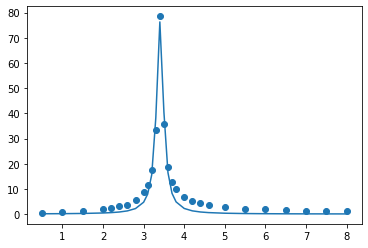

In [11]:
plt.plot(freq,lorentzian(freq, params[0], params[1], params[2]))
plt.scatter(freq,oneOverZ);

## Fitting other functions

To fit other functions you need to change the fitting function and the number of parameters passed in the optimization routine - you could try fitting your data to a Gaussian instead.